Header

In [2]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import csv
import os
from scipy.optimize import curve_fit
import scipy
from scipy.fft import fft, rfft, irfft,ifft,fftfreq



In [3]:
#Below is a function to get information from a waveform file name
#The key words and argument names will need to be change if anything changes in the naming
argumentlist= ["L","A","C","G","P","T","noise"]
argmuentname= ["Laser","Anode","Cathode","Grid","Pressure","Temperature","noise"]
def find_arg_waveforms(filename=fname):
    fulfilename=fname
    filename=fulfilename[fulfilename.rfind("/")+1:]
    #print(filename)

    channelList=[]
    unitlist=[]
    waveform_info={}

    for i,arg in enumerate(argumentlist):
        
        fpos=filename.find(arg)
        lpos=filename[fpos:].find("-")
        if lpos <0:
            lpos=filename[fpos:].rfind("_")
        if fpos <=0 or lpos <=0:
            waveform_info[argmuentname[i]]=""
        else:        
            waveform_info[argmuentname[i]]=filename[fpos+1:fpos+lpos]
        if arg=="noise":
            if fpos >=0:
                waveform_info["noise"] =1
                waveform_info["window"]=""
            else:
                waveform_info["noise"] =0
                waveform_info["window"]=""

    waveform_info["Date"]=filename[:filename.find("-")]
    waveform_info["Filename"]=filename
    waveform_info["Path"]=fulfilename.replace("/"+filename,"")
    
    if waveform_info["Pressure"] != "":
        Pstr=waveform_info["Pressure"]
        if Pstr[0] =="0":
            newPstr= Pstr[1]+ "." + Pstr[2]
        else:
            newPstr= Pstr[0]+Pstr[1]+ "." + Pstr[2]
        waveform_info["Pressure"]=newPstr

    if waveform_info["Temperature"] == "":
        waveform_info["Temperature"] =295





    return waveform_info


NameError: name 'fname' is not defined

In [ ]:
def gaus(x,A,b,c):
    return A*np.exp( - ( x-b)**2/(2*c**2))

def convgaus(x,A,t0,T,s,offset):
    return A*np.exp(-(x-t0)/T)*np.exp( -(x-t0)**2/(2*s**2)) + offset

def errfunc(x, a, b, z, f):
    return a * scipy.special.erf((x - z)*f) + b


In [ ]:
x=np.arange(-5,5,0.01)

y=convgaus(x,-1,2,0.05,0.1,-40)

plt.errorbar(x,y)

In [ ]:


filelist=glob.glob('./data/20230922-*.csv')

DFs=[]
lasercur=[22.0,22.5,23.0,23.5,24.0,24.5,25.0,25.5]
for i,file in enumerate(filelist):


    DF=pd.read_csv(file,skiprows=[1])
    DFs.append(DF)
    


In [ ]:
f=open(file)
print(f.readlines())

f.close()

In [ ]:


fig, plots = plt.subplots(1, 1, figsize=(10,6))



for i,DF in enumerate(DFs):

    plt.errorbar(DF["Time"],y=DF["Channel B"],label="%.1f mA"%(lasercur[i]))


plt.errorbar(DFs[0]["Time"],DFs[0]["Channel C"],label="Trigger")
plt.legend(ncol=2)

plt.grid()
plt.xlim(-0.9,5.1)


plt.ylabel("Volts")
plt.xlabel("Time(us)")


In [ ]:
Df=pd.read_csv("Data/ALL0001.CSV",skiprows=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],index_col=False,names=["T1","C1","T2","C2","T3","C3"])

In [ ]:
Df

In [ ]:
Df=pd.read_csv("Data/ALL0001.CSV",
               skiprows=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],
               index_col=False,names=["T1","C1","T2","C2","T3","C3"])


fig, plots = plt.subplots(1, 1, figsize=(10,6))


plt.errorbar(x=Df["T1"],y=Df["C1"],label="Trigger")
plt.errorbar(x=Df["T2"],y=Df["C2"],label="Preamp")
plt.errorbar(x=Df["T3"],y=Df["C3"],label="Shaper")

plt.grid("True")
plt.legend()

In [ ]:
Df=pd.read_csv("Data/ALL0005.CSV",
               skiprows=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],
               index_col=False,names=["T1","C1","T2","C2","T3","C3"])


fig, plots = plt.subplots(1, 1, figsize=(10,6))


plt.errorbar(x=Df["T1"],y=Df["C1"],label="Trigger")
plt.errorbar(x=Df["T2"],y=Df["C2"],label="Preamp")
plt.errorbar(x=Df["T3"],y=Df["C3"],label="Shaper")



Df=pd.read_csv("Data/ALL0004.CSV",
               skiprows=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],
               index_col=False,names=["T1","C1","T2","C2","T3","C3"])


#fig, plots = plt.subplots(1, 1, figsize=(10,6))


#plt.errorbar(x=Df["T1"],y=Df["C1"],label="Trigger")
plt.errorbar(x=Df["T2"],y=Df["C2"],label="Preamp 2")
#plt.errorbar(x=Df["T3"],y=Df["C3"],label="Shaper")


plt.grid("True")
plt.legend()

In [ ]:
filename="./data/tek0004ALL.csv"
fig, plots = plt.subplots(1, 1, figsize=(5,3))

flist = glob.glob("./data/tek000?ALL.csv")
curlist = [26,25,24,23]

for i,filename in enumerate(flist):

    Df=pd.read_csv(filename,
               skiprows=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
               index_col=False,names=["T1","C1","C2"])

    print(max(Df["C2"]))

    #if i == 0:
    #    plt.errorbar(x=Df["T1"],y=Df["C1"],label="Trigger")

    plt.errorbar(x=Df["T1"],y=Df["C2"],label="%i A"%(curlist[i]))
    

plt.legend()
plt.grid()
plt.ylabel("Photo Diode Signal(V)")
plt.xlabel("Time")




In [ ]:
Df

In [ ]:
file_list[0]
waveforms=[]
with open(file_list[0]) as csvfile:
    waveform = list(csv.reader(csvfile))
    waveforms.append(waveform)

with open(file_list[1]) as csvfile:
    waveform = list(csv.reader(csvfile))
    waveforms.append(waveform)


print(waveforms[1][3],"\n",waveforms[0][3])

avg=np.average(waveforms,axis=0)

print(avg)


In [4]:
def is_convertible_to_int(s):
    try:
        int(s)
        return True
    except ValueError:
        return False

In [5]:

waveform_date=20231110
waveform_path="./data/waveforms/%s"%(str(waveform_date))



Runs=[]
def grab_waveform_avg(base_name=name,):
#if 1==1:
#    print(waveform_path)
    dirlist = glob.glob(waveform_path+"/*")
    for  dir in dirlist:
        if dir.find("-noise") > 0:
            break

        subname= dir.replace(waveform_path,"")
        subname=subname.replace("\\","")
        subname=subname.replace(str(waveform_date),"")
        subname=subname.replace("-L","L")
        
        if subname.find("C") > -1:                
            CPos=subname.find("C")
            CathPot=subname[CPos+1:subname.find("-",CPos)]
        else:
            CathPot=0

        if subname.find("G") > -1:
            GPos=subname.find("G")
            GridPot=subname[GPos+1:subname.find("-",GPos)]
        else:
            GridPot=0
        
        if subname.find("A") > -1:
            APos=subname.find("A")
            AnodePot=subname[APos+1:len(subname)]
            if not is_convertible_to_int(AnodePot):
                AnodePot=AnodePot[:AnodePot.find("-")]

        else :
            AnodePot = 0
        
        
        if subname.find("L") > -1:
            LPos=subname.find("L")
            LaserCur=subname[LPos+1:subname.find("-",LPos)]
            LaserCur=LaserCur.replace("_",".")
        else:
            LaserCur=0



        Voltags=[CathPot,GridPot,AnodePot]

        #Build up file name from the base name and path

        #print(waveform_path)
        file_base=waveform_path+"/"+str(waveform_date)+"-"+subname

        #print(file_base)
        file_list= glob.glob(file_base+"/*.csv")

        #print("list\n",file_list)
        #prepare list for each channel for every waveform
        waveforms=[]
        ChAs=[] 
        ChBs=[]
        ChCs=[]
        Times=[]
        print(file_base)
        
        if len(file_list)<0:
            print("No files found")
            break
    #        return 0

        #Loop through each file(waveform) 
        for file in file_list:
        
            waveform=pd.read_csv(file,skiprows=[1,2])#Read in the csv info into datafram

            #Grab each column and build 2D array with time steps for each channel then appended through each waveform
            Times.append(np.array(waveform["Time"]))
            ChAs.append(np.array(waveform["Channel A"]))
            ChBs.append(np.array(waveform["Channel B"]))
            ChCs.append(np.array(waveform["Channel C"]))
            
        print("Number of waveforms : ",len(ChCs))
        #average each channel
        Time=np.average(Times, axis=0)
        ChA=np.average(ChAs, axis=0)*1000
        ChB=np.average(ChBs, axis=0)
        ChC=np.average(ChCs, axis=0)

        waveform_dict={}
        waveform_dict["Time"]=Time
        waveform_dict["Pickoff"]=ChA
        waveform_dict["PreAmp"]=ChB
        waveform_dict["Shaper"]=ChC

        waveform_dict["LaserCur"]=LaserCur
        waveform_dict["Cathode"]=int(Voltags[0])
        waveform_dict["Grid"]   =int(Voltags[1])
#        print("Volts =",Voltags[2])
        waveform_dict["Anode"]  =int(Voltags[2])

#        print("Laser Current : ",waveform_dict["LaserCur"])
        Runs.append(waveform_dict)
        
        

    return waveform_dict


#    return 



NameError: name 'name' is not defined

In [6]:
Voltages

NameError: name 'Voltages' is not defined

In [7]:
DF= pd.DataFrame.from_dict(Runs)
DF

""


In [8]:
DF_235= DF.query("LaserCur == '23.5'")


DF_235=DF_235

UndefinedVariableError: name 'LaserCur' is not defined

In [ ]:
DF_235=DF_235.sort_values(by=["Cathode"])


In [ ]:
int(DF_235["Voltages"][0])

NameError: name 'DF_235' is not defined

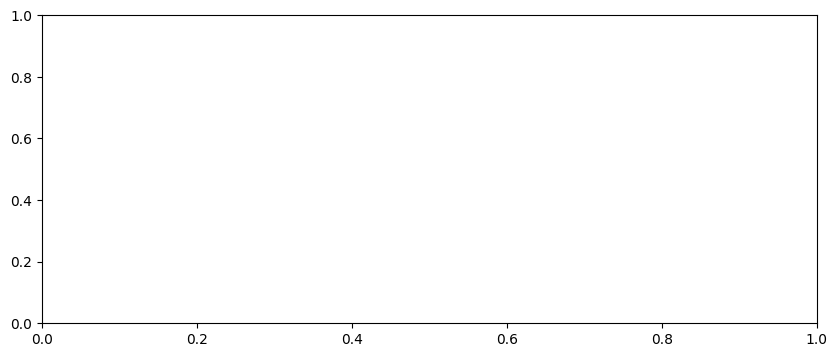

In [9]:
fig, plots = plt.subplots(1, 1, figsize=(10,4))


color= ["Red","Green", "Blue"]
shape= ['x',"o","."]
i=0
for DF in DF_235.iterrows():
    #print(DF[1])
    # label="Trigger\n Cathode V \n %s"%(DF[1]["Voltages"][0]), label="Shaper"
    PickOff_popt, Pickoff_pcov= curve_fit(gaus,np.array(DF[1]["Time"]),np.array(DF[1]["Pickoff"] )/100)  

    PickOff_x = np.array(DF[1]["Time"])
    Pickoff_fity=gaus(PickOff_x,PickOff_popt[0],PickOff_popt[1],PickOff_popt[2])

    #if i==0:
        #plt.errorbar(x=PickOff_x,y=Pickoff_fity,label="Fit")
    #print(PickOff_popt[0],PickOff_popt[1])

    #fit_range_low  = int(np.floor((np.where(DF[1]["Shaper"]== min(DF[1]["Shaper"]))[0][0])*0.9))
    #fit_range_high = int(np.ceil((np.where(DF[1]["Shaper"]== min(DF[1]["Shaper"]))[0][0])*1.001))
    fit_range_low  = np.where(DF[1]["Time"] >0.24)[0][0]
    fit_range_high = np.where(DF[1]["Time"] >0.37)[0][0]

    #print(fit_range_low,fit_range_high)
    #print(DF[1]["Time"][fit_range_low],DF[1]["Time"][fit_range_high])
    
    lowindex=np.where(DF[1]["Shaper"]  == min(DF[1]["Shaper"]))

    #print(np.array(DF[1]["Time"])[lowindex] )
    #              A, t0, Tau,  sigma, offset
    bounds_low =[-1000, 0,0.00001]#,0.0000001,-100]
    bounds_high=[1000,100,    100]#,        5,100]
    p0=[min(DF[1]["Shaper"]),                       #A
        np.array(DF[1]["Time"])[lowindex][0],       #t0
        0.01]#,                                       #tau
        #0.00001,                                    #sigma
        #np.average(DF[1]["Shaper"][:100])]          #offset
    
    print("fitting p0 " , p0)
    try:
        PickShaper_popt, PickShaper_pcov= curve_fit(gaus,np.array(DF[1]["Time"][fit_range_low:fit_range_high]) ,
                                                    np.array(DF[1]["Shaper"][fit_range_low:fit_range_high]) ,
                                                    p0=p0, bounds=(bounds_low,bounds_high)  )

        print("Fitting coef" ,PickShaper_popt[0],PickShaper_popt[1],PickShaper_popt[2])#,PickShaper_popt[3],PickShaper_popt[4])
        if len(PickShaper_pcov) >0:
            xfit=np.array(DF[1]["Time"][fit_range_low:fit_range_high]) 
            yfit=gaus(xfit,PickShaper_popt[0],PickShaper_popt[1],PickShaper_popt[2])#,PickShaper_popt[3],PickShaper_popt[4])
           # plt.errorbar(x=xfit,y=yfit,c=color[i],fmt="-.")

        
        

    except ValueError:
        print("error")




    #plt.errorbar(x=np.array(DF[1]["Time"]),  y = np.array(DF[1]["Pickoff"] )/100, c=color[i],fmt="",ms=1, marker=shape[0] )
    #plt.errorbar(x=xfit,y=yfit,c=color[i],fmt="--")

    xplot=np.array(DF[1]["Time"][0::1])
    yplot=np.array(DF[1]["Shaper"][0::1] )
    plt.errorbar(x=xplot,  y =yplot , ms=3,c=color[i], 
                 fmt=" ",marker=shape[2],label="-%s Volts"%(DF[1]["Cathode"]))








    i=i+1

  

plt.legend(loc="upper right",ncol=1)


plt.ylabel("Signal(mV)")
plt.xlabel("Time(uS)")
plt.xlim(-0.52,1.51)
plt.grid()


plt.title("Cathode Signal dependence on bias voltages")

In [10]:
np.where(DF[1]["Shaper"]  == min(DF[1]["Shaper"]))

KeyError: 1

In [11]:
[i for i,x in enumerate(DF[1]["Shaper"]) if x == min(DF[1]["Shaper"])]

KeyError: 1

In [ ]:

st="-L23_5-C100-G0-A0"

st.find("L"),st.find("-",st.find("C"))

In [ ]:

waveform_date=20231102
waveform_path="./data/waveforms/%s/"%(str(waveform_date))

name=str(waveform_date)+"-L23_5-C50-C0-A0_"



In [ ]:
wf_info=grab_waveform_avg(name)

if wf_info == 0:
    print("Issues")
else:
    Time=wf_info["Time"]
    Pickoff=wf_info["Pickoff"]
    PreAmp=wf_info["PreAmp"]
    Shaper=wf_info["Shaper"]




In [ ]:
file_base

In [ ]:


plt.errorbar(x=Time,y=Pickoff)
plt.errorbar(x=Time,y=PreAmp)
plt.errorbar(x=Time,y=Shaper)

In [ ]:
dir="./data/waveforms/20231102/20231102-L23_5-C50-C0-A0/20231102*"

file_list=glob.glob(dir)

for file in file_list:
    print(file)
    #file=file.replace("\\","/")
    newfile=file.replace("C0","G0")

    

    print("\t",newfile)
    os.rename(file, newfile)

In [ ]:
chBs=[]
t=0
i=0
for wf in waveforms:
    chBs.append(wf["Channel C"])
    #print(wf["Channel C"].iloc[0])
    t=t+wf["Channel C"].iloc[0]
#print(t/len(chBs))

AllCHB =np.array([chBs])

CHB_ave=np.average(AllCHB,axis=1)
#print(CHB_ave[0])




In [ ]:
waveform

In [ ]:
DF_laser= DF.query("Cathode == 250")
DF_laser

In [ ]:
fig, plots = plt.subplots(1, 1, figsize=(10,4))


color= ["Red","Green", "Blue"]
shape= ['x',"o","."]
i=0
for DF in DF_laser.iterrows():
    #print(DF[1])
    # label="Trigger\n Cathode V \n %s"%(DF[1]["Voltages"][0]), label="Shaper"
    PickOff_popt, Pickoff_pcov= curve_fit(gaus,np.array(DF[1]["Time"]),np.array(DF[1]["Pickoff"] )/100)  

    PickOff_x = np.array(DF[1]["Time"])
    Pickoff_fity=gaus(PickOff_x,PickOff_popt[0],PickOff_popt[1],PickOff_popt[2])

    #if i==0:
        #plt.errorbar(x=PickOff_x,y=Pickoff_fity,label="Fit")
    #print(PickOff_popt[0],PickOff_popt[1])

    #fit_range_low  = int(np.floor((np.where(DF[1]["Shaper"]== min(DF[1]["Shaper"]))[0][0])*0.9))
    #fit_range_high = int(np.ceil((np.where(DF[1]["Shaper"]== min(DF[1]["Shaper"]))[0][0])*1.001))
    fit_range_low  = np.where(DF[1]["Time"] >0.24)[0][0]
    fit_range_high = np.where(DF[1]["Time"] >0.37)[0][0]

    #print(fit_range_low,fit_range_high)
    #print(DF[1]["Time"][fit_range_low],DF[1]["Time"][fit_range_high])
    
    lowindex=np.where(DF[1]["Shaper"]  == min(DF[1]["Shaper"]))

    #print(np.array(DF[1]["Time"])[lowindex] )
    #              A, t0, Tau,  sigma, offset
    bounds_low =[-1000, 0,0.00001]#,0.0000001,-100]
    bounds_high=[1000,100,    100]#,        5,100]
    p0=[min(DF[1]["Shaper"]),                       #A
        np.array(DF[1]["Time"])[lowindex][0],       #t0
        0.01]#,                                       #tau
        #0.00001,                                    #sigma
        #np.average(DF[1]["Shaper"][:100])]          #offset
    
    print("fitting p0 " , p0)
    try:
        PickShaper_popt, PickShaper_pcov= curve_fit(gaus,np.array(DF[1]["Time"][fit_range_low:fit_range_high]) ,
                                                    np.array(DF[1]["Shaper"][fit_range_low:fit_range_high]) ,
                                                    p0=p0, bounds=(bounds_low,bounds_high)  )

        print("Fitting coef" ,PickShaper_popt[0],PickShaper_popt[1],PickShaper_popt[2])#,PickShaper_popt[3],PickShaper_popt[4])
        if len(PickShaper_pcov) >0:
            xfit=np.array(DF[1]["Time"][fit_range_low:fit_range_high]) 
            yfit=gaus(xfit,PickShaper_popt[0],PickShaper_popt[1],PickShaper_popt[2])#,PickShaper_popt[3],PickShaper_popt[4])
           # plt.errorbar(x=xfit,y=yfit,c=color[i],fmt="-.")

        
        

    except ValueError:
        print("error")




    #plt.errorbar(x=np.array(DF[1]["Time"]),  y = np.array(DF[1]["Pickoff"] )/100, c=color[i],fmt="",ms=1, marker=shape[0] )
    #plt.errorbar(x=xfit,y=yfit,c=color[i],fmt="--")

    xplot=np.array(DF[1]["Time"][0::1]) 
    yplot=np.array(DF[1]["Shaper"][0::1] ) 
    plt.errorbar(x=xplot,  y =yplot , ms=3,c=color[i], 
                 fmt=" ",marker=shape[2],label="%s Amps"%(DF[1]["LaserCur"]))

    i=i+1

  

plt.legend(loc="upper right",ncol=1)


plt.ylabel("Signal(mV)")
plt.xlabel("Time(uS)")
plt.xlim(-0.52,1.51)
plt.grid()


plt.title("Cathode Signal dependence on Laser Current")

In [ ]:

waveform_date=20231110
waveform_path="./data/waveforms/%s"%(str(waveform_date))



def grab_waveform_avg(waveform_path):
    Runs=[]

    if 1==1:
        #print(waveform_path)
        dirlist = glob.glob(waveform_path+"/*")

        print(dirlist)

        for  dir in dirlist:
            print(dir)
            subname= dir.replace(waveform_path,"")
            delim="-"
            name_sep= subname.split(delim)
            print(name_sep)
          
            subname=subname.replace("\\","")
            subname=subname.replace(str(waveform_date),"")
            subname=subname.replace("%sL"%(delim),"L")
            

            if "noise" in dir:
                LaserCur=0
                Voltags=[0,0,0]
            else:    

                
                key="L"
                item =[ i for i in name_sep if i.find(key) >= 0]
                result=[ i.replace(key,"") for i in item ]
                LaserCur=result[0] if len(result)>0  else 0
                #print(subname,result)


                key="C"
                item =[ i for i in name_sep if i.find(key) >= 0]
                result=[ i.replace(key,"") for i in item ]
                CathPot=  result[0] if len(result)>0  else 0
                #print(subname,result)

                key="G"
                item =[ i for i in name_sep if i.find(key) >= 0]
                result=[ i.replace(key,"") for i in item ]
                GridPot=  result[0] if len(result)>0  else 0

                key="A"
                item =[ i for i in name_sep if i.find(key) >= 0]
                result=[ i.replace(key,"") for i in item ]
                AnodePot=  result[0] if len(result)>0  else 0

                #print("check" ,spec_loc,Apos_end)
                #print(stringtest[:Apos_end])
                #if AnodePos

                Voltags=[CathPot,GridPot,AnodePot]

                print("Voltages ", Voltags)
                print("Cur", LaserCur)

            

            #Build up file name from the base name and path
            subname=subname.replace("-n","n")
            #print(waveform_path)
            file_base=waveform_path+"/"+str(waveform_date)+delim +subname
            if subname.find("vac_uv")>=0:
                continue
            print(file_base)
            file_list= glob.glob(file_base+"/*.csv")

            #print("list\n",file_list)
            #prepare list for each channel for every waveform
            waveforms=[]
            ChAs=[] 
            ChBs=[]
            ChCs=[]
            Times=[]
            #print(file_base)
            if len(file_list)<0:
                print("No files found")
                break
        #        return 0

            #Loop through each file(waveform) 
            print("Number of waveforms: ", len(file_list))
            for file in file_list:
                #print("/t",file)
                waveform=pd.read_csv(file,skiprows=[1,2])#Read in the csv info into datafram
                
                #Grab each column and build 2D array with time steps for each channel then appended through each waveform
                Times.append(np.array(waveform["Time"]))
                ChAs.append(np.array(waveform["Channel A"]))
                ChBs.append(np.array(waveform["Channel B"]))
                ChCs.append(np.array(waveform["Channel C"]))
                

                            
            #average each channel
            Time=np.average(Times, axis=0)
            ChA=np.average(ChAs, axis=0)*1000
            ChB=np.average(ChBs, axis=0)
            ChC=np.average(ChCs, axis=0)

            waveform_dict={}
            waveform_dict["Time"]=Time
            waveform_dict["Pickoff"]=ChA
            waveform_dict["PreAmp"]=ChB
            waveform_dict["Shaper"]=ChC

            waveform_dict["LaserCur"]=LaserCur
            waveform_dict["Cathode"]=int(Voltags[0])
            waveform_dict["Grid"]   =int(Voltags[1])
            waveform_dict["Anode"]  =int(Voltags[2])
            waveform_dict["Info"]   =name_sep[-2]+"-" +name_sep[-1]
 
        # print(waveform_dict["LaserCur"])
            Runs.append(waveform_dict)
        print(len(Runs))
    #    return waveform_dict


        return Runs



In [12]:

waveform_date=20231110
waveform_path="./data/waveforms/%s"%(str(waveform_date))


num_requested=3
def grab_waveforms(waveform_path,num_requested=1):

    Runs=[]

    if 1==1:
        #print(waveform_path)
        dirlist = glob.glob(waveform_path+"/*")

        print(dirlist)

        for  dir in dirlist:
            print(dir)
            subname= dir.replace(waveform_path,"")
            delim="-"
            name_sep= subname.split(delim)
            print(name_sep)
          
            subname=subname.replace("\\","")
            subname=subname.replace(str(waveform_date),"")
            subname=subname.replace("%sL"%(delim),"L")
            

            if "noise" in dir:
                LaserCur=0
                Voltags=[0,0,0]
            else:    

                
                key="L"
                item =[ i for i in name_sep if i.find(key) >= 0]
                result=[ i.replace(key,"") for i in item ]
                LaserCur=result[0] if len(result)>0  else 0
                #print(subname,result)


                key="C"
                item =[ i for i in name_sep if i.find(key) >= 0]
                result=[ i.replace(key,"") for i in item ]
                CathPot=  result[0] if len(result)>0  else 0
                #print(subname,result)

                key="G"
                item =[ i for i in name_sep if i.find(key) >= 0]
                result=[ i.replace(key,"") for i in item ]
                GridPot=  result[0] if len(result)>0  else 0

                key="A"
                item =[ i for i in name_sep if i.find(key) >= 0]
                result=[ i.replace(key,"") for i in item ]
                AnodePot=  result[0] if len(result)>0  else 0

                #print("check" ,spec_loc,Apos_end)
                #print(stringtest[:Apos_end])
                #if AnodePos

                Voltags=[CathPot,GridPot,AnodePot]

                print("Voltages ", Voltags)
                print("Cur", LaserCur)

            

            #Build up file name from the base name and path
            subname=subname.replace("-n","n")
            #print(waveform_path)
            file_base=waveform_path+"/"+str(waveform_date)+delim +subname
            if subname.find("vac_uv")>=0:
                continue
            print(file_base)
            file_list= glob.glob(file_base+"/*.csv")

            #print("list\n",file_list)
            #prepare list for each channel for every waveform
            waveforms=[]
            ChAs=[] 
            ChBs=[]
            ChCs=[]
            Times=[]
            #print(file_base)
            if len(file_list)<0:
                print("No files found")
                break
        #        return 0

            #Loop through each file(waveform) 
            print("Number of waveforms: ", len(file_list))
            count=0
            for file in file_list:
                
                #print("/t",file)
                waveform=pd.read_csv(file,skiprows=[1,2])#Read in the csv info into datafram
                
                #Grab each column and build 2D array with time steps for each channel then appended through each waveform
                Times.append(np.array(waveform["Time"]))
                ChAs.append(np.array(waveform["Channel A"]))
                ChBs.append(np.array(waveform["Channel B"]))
                ChCs.append(np.array(waveform["Channel C"]))
                count=count+1
                if count >= num_requested:
                    break

                            
            #average each channel
            Time=Times #np.average(Times, axis=0)
            ChA=ChAs #np.average(ChAs, axis=0)*1000
            ChB=ChBs #np.average(ChBs, axis=0)
            ChC=ChCs #np.average(ChCs, axis=0)

            waveform_dict={}
            waveform_dict["Time"]=Time
            waveform_dict["Pickoff"]=ChA
            waveform_dict["PreAmp"]=ChB
            waveform_dict["Shaper"]=ChC

            waveform_dict["LaserCur"]=LaserCur
            waveform_dict["Cathode"]=int(Voltags[0])
            waveform_dict["Grid"]   =int(Voltags[1])
            waveform_dict["Anode"]  =int(Voltags[2])
            waveform_dict["Info"]   =name_sep[-2]+"-" +name_sep[-1]
 
        # print(waveform_dict["LaserCur"])
            Runs.append(waveform_dict)
            
        print(len(Runs))
    #    return waveform_dict


        return Runs



In [ ]:
waveform_date=20231110
waveform_path="./data/waveforms/%s"%(str(waveform_date))

Runs= grab_waveform_avg(waveform_path)


In [ ]:
waveform_date=20231110
waveform_path="./data/waveforms/%s"%(str(waveform_date))

Runs= grab_waveforms(waveform_path)



In [ ]:
Runs[0]["Time"]

In [ ]:
name="./data/waveforms/20231116/20231116_L23_C1000_G0_A200_gas_anode/"
namelist=name.split("_")

key="C"
item =[ i for i in namelist if i.find(key) >= 0]
result=[ i.replace(key,"") for i in item ]
result[0]

In [ ]:
Runs

In [ ]:
DFs= pd.DataFrame.from_dict(Runs)
DFs=DFs.sort_values(by="Cathode")
DFs

In [ ]:
def noise_sin(x,w=0,A=0,offset=0):
    return A * np.sin( x* 2 * np.pi*w + offset)

def noise_exp(x,w=0,A=0,offset=0):
    return A*np.exp(w*2.0*np.pi*np.abs(x)*1.j + offset)

def noise_sinexp(x,w=0,A=0,lam=0,offset=0):
    return A *np.exp(-lam*np.abs(x))*( np.sin( x* 2 * np.pi*w + offset) + np.cos( x* 2 * np.pi*w + offset) )


In [ ]:

fig, plots = plt.subplots(1, 1, figsize=(10,4))


color= ["Red","Green", "Blue","cyan"]
shape= ['x',"o",".","+"]
i=0
time_zs=[]
volts=[]
for DF in DFs[1:].iterrows():
        #print(DF[1])

    newdf= pd.DataFrame(DF[1][['Time',"Pickoff","PreAmp","Shaper"]]).transpose()
    #print(newdf["Time"].index[0])
    j=newdf["Time"].index[0]

    newdict={}
    newdict["Time"]=newdf["Time"][j]
    newdict["Pickoff"]=newdf["Pickoff"][j]
    newdict["PreAmp"]=newdf["PreAmp"][j]
    newdict["Shaper"]=newdf["Shaper"][j]

    newdf= pd.DataFrame.from_dict(newdict)
    #print("newdf" ,len(newdf))
    samplesize=50
    resampledf = newdf.groupby(newdf.index // samplesize).mean()
    #print("sampled", len(resampledf))


    volts.append(DF[1]["Cathode"])
    
    
    xplot=np.array(resampledf["Time"][0::])
    yplot=np.array(resampledf["PreAmp"][0::] )
    plots.errorbar(x=xplot,  y =yplot+ i*0.0001 , ms=5,c=color[i], 
                 fmt=" ",
                 marker=shape[i],
                 label="-%s Volts"%(DF[1]["Cathode"]))


    x1=25
    x2=-35
    b=np.average(resampledf["PreAmp"][0:int(np.floor(len(resampledf["PreAmp"])/2))])
    a=np.average(resampledf["PreAmp"][int(np.floor(len(resampledf["PreAmp"])/2)):])
    z=xplot[np.where(resampledf["PreAmp"].diff(10)==resampledf["PreAmp"].diff(10).max())][0]
    f=0
    p0=[a,b,z,f]
    print(p0)


    print(xplot[x1],xplot[x2])
    ppot,pcov =curve_fit(errfunc  ,xplot[x1:x2],yplot[x1:x2],p0=p0)
    #print(ppot)
    #print(pcov)

    time_zs.append(ppot[2])


    xfit=np.arange(xplot[x1],xplot[x2]+0.02,0.01)
    
    yfit=errfunc(xfit,ppot[0],ppot[1],ppot[2],ppot[3]) + i*0.0001



    plots.errorbar(x=xfit,  y =yfit,c=color[i],fmt="-.")  

    i=i+1
    #print("\n")
    #break

  
#plots[0].legend(loc="upper right",ncol=1)
plt.legend(loc="upper right",ncol=1)


#plots[0].set_ylabel("Shaper \n Signal(mV)")
#plots[0].set_xlabel("Time(uS)")
plt.xlim(-0.52,41.51)
#plots[0].grid()
plots.grid()
plots.set_ylabel("Preamp \n Signal(mV)")
plots.set_xlabel("Time(uS)")


plots.set_title("Anode Signal dependence on bias voltages")

#fig2, plts2 = plt.subplots(1, 1, figsize=(10,6))
plt.subplots(figsize=(10,4))


err_cell_length=0.5 #+-mm
err_cathode_voltage=5 #volts
err_time_delay=1.25#us

err_drift_field_percent= np.sqrt( (err_cell_length/20)**2 + (err_cathode_voltage/np.array(volts))**2 ) 
err_drift_time_percent  = np.sqrt((err_time_delay/np.array(time_zs))**2 ) 

xerr= err_drift_field_percent
yerr= err_drift_time_percent

plt.errorbar(x=np.array(volts)/2.0,y=np.array(time_zs),xerr=xerr*np.array(volts)/2.0, yerr=yerr*np.array(time_zs),
marker="h",
fmt=" ")

plt.xlabel("Volts/cm")
plt.ylabel("Time Delay (us))")
plt.grid()
plt.ylim(10.1,25)



In [ ]:
err_drift_field_percent,err_drift_vel_percent

In [ ]:
np.sqrt((err_cathode_voltage/np.array(volts))**2 + (err_cell_length/20)**2),np.sqrt((err_cathode_voltage/np.array(volts))**2 + (err_cell_length/20)**2) * np.array(volts)/2.0

In [ ]:
fig, plots = plt.subplots(1, 1, figsize=(10,4))


color= ["Red","Green", "Blue","cyan"]
shape= ['x',"o",".","+"]
i=0
time_zs=[]
volts=[]
for i,DF in enumerate(DFs[1:].iterrows()):
        #print(DF[1])

    newdf= pd.DataFrame(DF[1][['Time',"Pickoff","PreAmp","Shaper"]]).transpose()
    #print(newdf["Time"].index[0])
    j=newdf["Time"].index[0]

    newdict={}
    newdict["Time"]=newdf["Time"][j]
    newdict["Pickoff"]=newdf["Pickoff"][j]
    newdict["PreAmp"]=newdf["PreAmp"][j]
    newdict["Shaper"]=newdf["Shaper"][j]

    newdf= pd.DataFrame.from_dict(newdict)
    print("newdf" ,len(newdf))
    samplesize=1
    resampledf = newdf.groupby(newdf.index // samplesize).mean()
    #print("sampled", len(resampledf))


    volts.append(DF[1]["Cathode"])
    
    
    xplot=np.array(resampledf["Time"][0::])
    yplot=np.array(resampledf["Shaper"][0::] )
    plots.errorbar(x=xplot,  y =yplot+ i*0.01 , ms=5,c=color[i], 
                 fmt="",
                 marker=shape[i],
                 label="-%s Volts"%(DF[1]["Cathode"]))
    


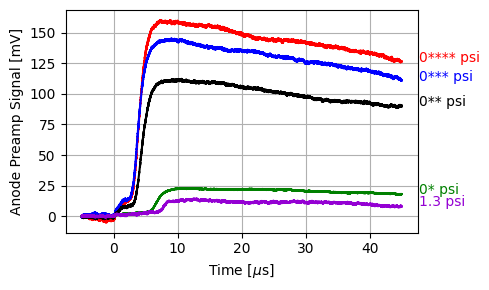

In [28]:
recover1=pd.read_csv("./data/waveforms/20240307/20240307-recovery-1/20240307-recovery-1/20240307-recovery-1_11.csv",skiprows=[1])
recover2=pd.read_csv("./data/waveforms/20240307/20240307-recovery-2/20240307-recovery-2/20240307-recovery-2_11.csv",skiprows=[1])
fig, plots = plt.subplots(1, 1, figsize=(5,3))

DF_old=[]
labels=["0****","0***","0**","0*","1.3","2.7"]
colors=["r","blue","black","green","darkviolet","lightcoral"]
j=0
DFs=[]
for i in [6,5,1,4,2,3]:
    if i ==5:
        continue

    fname="./data/waveforms/20240307/20240307-recovery-%i/20240307-recovery-%i/20240307-recovery-%i_11.csv"%(i,i,i)

    #f=fname.open()
    #print(f.readlines)
    

    DF=pd.read_csv(fname,skiprows=[1])
    print()
    DF_old.append(DF)
    offset_norm =DF["average(B)"].loc[0]

    plt.errorbar(x=DF["Time"],y=DF["average(B)"]-DF["average(B)"].loc[0],label="%s psi"%(labels[j]),c=colors[j])

    ypos=DF["average(B)"].loc[24999]-DF["average(B)"].iloc[0]#=max(DF["average(B)"]-DF["average(B)"].loc[0])


    plt.text(47.7,ypos,"%s psi"%(labels[j]),color=colors[j])
    j=j+1

plt.grid()
plt.ylabel("Anode Preamp Signal [mV]")
plt.xlabel("Time [$\mu$s]")
#plt.legend()
#1plt.title("Preamp signal for multiple ammounts of xenon in cell")
plt.tight_layout()



0
./data/waveforms/20240308\20240308-A200-C500-L28-P009\20240308-A200-C500-L28-P009_11.csv
175.0883 0.99 r 175.0883
./data/waveforms/20240308\20240308-A200-C500-L28-P013\20240308-A200-C500-L28-P013_11.csv
111.78186 1.3 blue 63.30644000000001
2
./data/waveforms/20240308\20240308-A200-C500-L28-P020\20240308-A200-C5000-L28-P020_11.csv
46.40498000000001 2.0 lightcoral 65.37687999999999
./data/waveforms/20240308\20240308-A200-C500-L28-P027\20240308-A200-C500-L28-P027_11.csv
29.066959999999995 2.7 black 22.338020000000014
4
./data/waveforms/20240308\20240308-A200-C500-L28-P035\20240308-A200-C500-L28-P035_11.csv
10.490220000000008 3.5 green 17.009779999999992
5
./data/waveforms/20240308\20240308-A200-C500-L28-P050\20240308-A200-C500-L28-P050_11.csv
5.731829999999995 5 darkviolet 14.268170000000005


NameError: name 'DF_old' is not defined

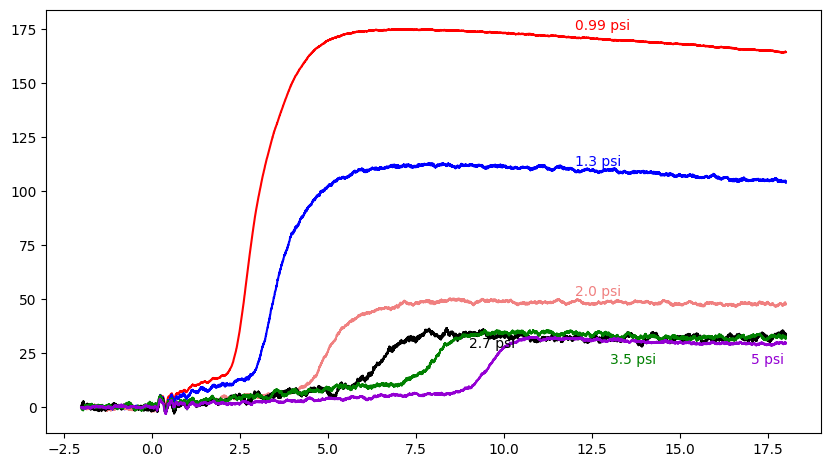

In [131]:

fig, plots = plt.subplots(1, 1, figsize=(10,5.5))

date=20240308
flist = glob.glob("./data/waveforms/%s/*"%(date))

last_ypos=0
P=[0.99,1.3,2.0,2.7,3.5,5]

colors=["r","blue","lightcoral","black","green","darkviolet"]

for i,subdir in enumerate(flist):

    if i != 1 and i != 3:
        print(i)
        #continue


    fname=glob.glob(subdir+"/*")[-1]
    print(fname)
    DF=pd.read_csv(fname,skiprows=[0,1],names=['Time','Channel A','Channel B', 'average(B)'])
    
    offset_norm =DF["average(B)"].loc[0]

    plt.errorbar(x=DF["Time"],y=DF["average(B)"]-DF["average(B)"].loc[0],color=colors[i]) #,label="%s psi"%(labels[j]),c=colors[j])
    
    ypos=DF["average(B)"].loc[4500]-DF["average(B)"].iloc[0]#=max(DF["average(B)"]-DF["average(B)"].loc[0])

    print(ypos,P[i],colors[i],abs(last_ypos-ypos))

    xpos=12
    if abs(last_ypos-ypos) <= 35:
        ypos=20
        xpos=9+(i-3)*4

    if i ==2:
        ypos=ypos+5

    if i==3:
        ypos=ypos+7.5
    
    plt.text(xpos,ypos,"%s psi"%(P[i]),color=colors[i], size=10,ha="left")
    last_ypos=ypos
    
DF_13=DF_old[4]
DF_27=DF_old[5]
DF=DF_13[:-16000:100]
#plt.errorbar(x=DF["Time"],y=DF["average(B)"]-DF["average(B)"].loc[0], color="blue",fmt="-.")
#plt.text(15,15,"Thrus: 1.3 psi",color="blue", size=10,ha="left")

DF=DF_27[:-16000:100]
#plt.errorbar(x=DF["Time"],y=DF["average(B)"]-DF["average(B)"].loc[0],            color="black",fmt="-.")
#plt.text(15,5,"Thurs 2.7 psi",color="black", size=10,ha="left")    





plt.grid()
plt.ylabel("mV")
plt.xlabel("uS")
#plt.legend()
plt.title("Preamp signal for multiple ammounts of xenon in cell")
#plt.yscale("log")

plt.ylim(0,185)

    





In [ ]:

fig, plots = plt.subplots(1, 1, figsize=(10,5.5))

date=20240308
flist = glob.glob("./data/waveforms/%s/*"%(date))

last_ypos=0
P=[0.99,1.3,2.0,2.7,3.5,5]

colors=["r","blue","lightcoral","black","green","darkviolet"]

for i,subdir in enumerate(flist):

    if i != 1 and i != 3:
        print(i)
        continue


    fname=glob.glob(subdir+"/*")[-1]
    print(fname)
    DF=pd.read_csv(fname,skiprows=[0,1],names=['Time','Channel A','Channel B', 'average(B)'])
    
    offset_norm =DF["average(B)"].loc[0]

    plt.errorbar(x=DF["Time"],y=DF["average(B)"]-DF["average(B)"].loc[0],color=colors[i]) #,label="%s psi"%(labels[j]),c=colors[j])
    
    ypos=DF["average(B)"].loc[4500]-DF["average(B)"].iloc[0]#=max(DF["average(B)"]-DF["average(B)"].loc[0])

    print(ypos,P[i],colors[i],abs(last_ypos-ypos))

    xpos=12
    if abs(last_ypos-ypos) <= 35:
        ypos=20
        xpos=9+(i-3)*4

    if i ==2:
        ypos=ypos+5

    if i==3:
        ypos=ypos+7.5
    
    plt.text(xpos,ypos,"Fri 03/08:%s psi"%(P[i]),color=colors[i], size=10,ha="left")
    last_ypos=ypos
    
DF_13=DF_old[4]
DF_27=DF_old[5]
DF=DF_13[:-16000:100]
plt.errorbar(x=DF["Time"],y=DF["average(B)"]-DF["average(B)"].loc[0], color="blue",fmt="-.")
plt.text(15,15,"Thrus 03/07: 1.3 psi",color="blue", size=10,ha="left")

DF=DF_27[:-16000:100]
plt.errorbar(x=DF["Time"],y=DF["average(B)"]-DF["average(B)"].loc[0],            color="black",fmt="-.")
plt.text(15,5,"Thurs 03/07: 2.7 psi",color="black", size=10,ha="left")    





plt.grid()
plt.ylabel("mV")
plt.xlabel("uS")
#plt.legend()
plt.title("Preamp signal for multiple ammounts of xenon in cell")
#plt.yscale("log")

plt.ylim(0,125)

    





In [ ]:

fig, plots = plt.subplots(1, 1, figsize=(10,5.5))

date=20240311
flist = glob.glob("./data/waveforms/%s/*"%(date))
#print(flist)
last_ypos=0
#P=[0.99,1.3,2.0,2.7,3.5,5]

colors=["r","blue","lightcoral","black","green","darkviolet"]

for i,subdir in enumerate(flist):

    if i <= 4:
        print(i)
        #continue




    fname=glob.glob(subdir+"/*")[-1]
    fname=fname.replace("\\","/")
    print(fname)
    info=find_arg_waveforms(fname)
    #print(info)
    #print(fname)

    cpos=fname.find("C")
    label="Cathode %s V"%(info["Cathode"])

    DF=pd.read_csv(fname,skiprows=[0,1],names=['Time','Channel A','Channel B', 'average(B)'])
    DFtemp=DF
    DF=DF[::100]
    offset_norm =DF["average(B)"].loc[0]

    plt.errorbar(x=DF["Time"],y=DF["average(B)"]-DF["average(B)"].loc[0],color=colors[i])#,label=label)
    
    ypos=DF["average(B)"].loc[4500]-DF["average(B)"].iloc[0]#=max(DF["average(B)"]-DF["average(B)"].loc[0])

    print(ypos,P[i],colors[i],abs(last_ypos-ypos))

    #print(DF["Time"])
    ypos = np.average(DFtemp["average(B)"][-2200:])-DF["average(B)"].loc[0]
    xpos = 8#DFtemp["Time"].loc[len(DFtemp["Time"])-100]
    if info["Cathode"] == "700":
        ypos=ypos+3

    print(xpos)
    plt.text(xpos,ypos,label,color=colors[i], size=10,ha="left")
    last_ypos=ypos
    
DF_13=DF_old[4]
DF_27=DF_old[5]
DF=DF_13[:-16000:100]
#plt.errorbar(x=DF["Time"],y=DF["average(B)"]-DF["average(B)"].loc[0], color="blue",fmt="-.")
#plt.text(15,15,"Thrus: 1.3 psi",color="blue", size=10,ha="left")

DF=DF_27[:-16000:100]
#plt.errorbar(x=DF["Time"],y=DF["average(B)"]-DF["average(B)"].loc[0],            color="black",fmt="-.")
#plt.text(15,5,"Thurs 2.7 psi",color="black", size=10,ha="left")    





plt.grid()
plt.ylabel("mV")
plt.xlabel("uS")
plt.xlim(-1.7,12)
plt.legend()
plt.title("Preamp signal for Pressure(%s psi), Anode (%s volts), Laser(%s Amps)"%(info["Pressure"], info["Anode"],info["Laser"]))
#plt.yscale("log")

#plt.ylim(0,125)

    





In [ ]:

fig, plots = plt.subplots(1, 1, figsize=(10,5.5))

date=20240312
flist = glob.glob("./data/waveforms/%s/*C500*"%(date))
print(flist)
channel_names=["Time" ,"Trigger","Anode_Preamp","Cathode_Preamp","Average_Cathode_Preamp","Average_Anode_Preamp"]

manual_ypos=[-15,-16.5,-18,-20,-20]
#print(flist)
last_ypos=0
#P=[0.99,1.3,2.0,2.7,3.5,5]

colors=["r","blue","lightcoral","black","green","darkviolet"]

for i,subdir in enumerate(flist):

    #if i <= 4:
     #   print(i)
        #continue




    fname=glob.glob(subdir+"/*")[-1]
    fname=fname.replace("\\","/")
    print(fname)
    info=find_arg_waveforms(fname)
    

    cpos=fname.find("C")
    label="Cell Pres. %s psi"%(info["Pressure"])

    DF=pd.read_csv(fname,skiprows=[0,1],names=channel_names)
    DFtemp=DF
    DF=DF[::100]
    offset_norm_cathode =np.average(DFtemp["Average_Cathode_Preamp"][:100])
    offset_norm_anode   =np.average(DFtemp["Average_Anode_Preamp"][:100])

    plt.errorbar(x=DF["Time"],y=DF["Average_Cathode_Preamp"]-offset_norm_cathode,color=colors[i],label=label)
    plt.errorbar(x=DF["Time"],y=DF["Average_Anode_Preamp"]-offset_norm_anode, fmt="-.",color=colors[i])
    
    #ypos=DF["Average_Cathode_Preamp"].loc[4500]-DF["Average_Cathode_Preamp"].iloc[0]#=max(DF["average(B)"]-DF["average(B)"].loc[0])

    #print(ypos,P[i],colors[i],abs(last_ypos-ypos))

    #print(DF["Time"])
    ypos = np.average(DFtemp["Average_Cathode_Preamp"][-1200:])-DF["Average_Cathode_Preamp"].loc[0] -2
    xpos = 8#DFtemp["Time"].loc[len(DFtemp["Time"])-100]
    if info["Cathode"] == "700":
        ypos=ypos
    
    print(abs(ypos-last_pos) )
    if abs(ypos-last_pos) < 1:
        ypos=ypos-2
    #print(xpos)
    if info["Cathode"] == "500":
        xpox=xpos+2

    ypos=manual_ypos[i]
    #plt.text(xpos,ypos,label,color=colors[i], size=10,ha="left")
    last_ypos=ypos

    
DF_13=DF_old[4]
DF_27=DF_old[5]
DF=DF_13[:-16000:100]
#plt.errorbar(x=DF["Time"],y=DF["average(B)"]-DF["average(B)"].loc[0], color="blue",fmt="-.")
#plt.text(15,15,"Thrus: 1.3 psi",color="blue", size=10,ha="left")

DF=DF_27[:-16000:100]
#plt.errorbar(x=DF["Time"],y=DF["average(B)"]-DF["average(B)"].loc[0],            color="black",fmt="-.")
#plt.text(15,5,"Thurs 2.7 psi",color="black", size=10,ha="left")    
plt.text(6,-13,"Cathode Signal")
plt.text(6,6,"Anode Signal")




plt.grid()
plt.ylabel("mV")
plt.xlabel("uS")
plt.xlim(-1.7,12)
plt.legend()
plt.title("Preamp signal for Cathode(500 V), Anode (%s volts), Laser(%s Amps)"%( info["Anode"],info["Laser"]))
#plt.yscale("log")

#plt.ylim(0,125)

    





In [ ]:

fig, plots = plt.subplots(1, 1, figsize=(10,5.5))

date=20240312
flist = glob.glob("./data/waveforms/%s/*P150*"%(date))

channel_names=["Time" ,"Trigger","Anode_Preamp","Cathode_Preamp","Average_Cathode_Preamp","Average_Anode_Preamp"]

manual_ypos=[-15,-16.5,-18,-20,-20]
#print(flist)
last_ypos=0
#P=[0.99,1.3,2.0,2.7,3.5,5]

colors=["r","blue","lightcoral","black","green","darkviolet"]

for i,subdir in enumerate(flist):

    #if i <= 4:
     #   print(i)
        #continue




    fname=glob.glob(subdir+"/*")[-1]
    fname=fname.replace("\\","/")
    #print(fname)
    info=find_arg_waveforms(fname)
    #if info["Pressure"] != "5.0":
    #    continue
    #print(info["Cathode"])
    #print(fname)

    cpos=fname.find("C")
    label="Cathode %s V"%(info["Cathode"])

    DF=pd.read_csv(fname,skiprows=[0,1],names=channel_names)
    DFtemp=DF
    DF=DF[::10]
    offset_norm_cathode =np.average(DFtemp["Average_Cathode_Preamp"][:100])
    offset_norm_anode   =np.average(DFtemp["Average_Anode_Preamp"][:100])

    plt.errorbar(x=DF["Time"],y=DF["Average_Cathode_Preamp"]-offset_norm_cathode,color=colors[i],label=label)
    plt.errorbar(x=DF["Time"],y=DF["Average_Anode_Preamp"]-offset_norm_anode, fmt="-.",color=colors[i])
    
    #ypos=DF["Average_Cathode_Preamp"].loc[4500]-DF["Average_Cathode_Preamp"].iloc[0]#=max(DF["average(B)"]-DF["average(B)"].loc[0])

    #print(ypos,P[i],colors[i],abs(last_ypos-ypos))

    #print(DF["Time"])
    ypos = np.average(DFtemp["Average_Cathode_Preamp"][-1200:])-DF["Average_Cathode_Preamp"].loc[0] -2
    xpos = 8#DFtemp["Time"].loc[len(DFtemp["Time"])-100]
    if info["Cathode"] == "700":
        ypos=ypos
    
    print(abs(ypos-last_pos) )
    if abs(ypos-last_pos) < 1:
        ypos=ypos-2
    #print(xpos)
    if info["Cathode"] == "500":
        xpox=xpos+2

    ypos=manual_ypos[i]
    #plt.text(xpos,ypos,label,color=colors[i], size=10,ha="left")
    last_ypos=ypos

    
DF_13=DF_old[4]
DF_27=DF_old[5]
DF=DF_13[:-16000:100]
#plt.errorbar(x=DF["Time"],y=DF["average(B)"]-DF["average(B)"].loc[0], color="blue",fmt="-.")
#plt.text(15,15,"Thrus: 1.3 psi",color="blue", size=10,ha="left")

DF=DF_27[:-16000:100]
#plt.errorbar(x=DF["Time"],y=DF["average(B)"]-DF["average(B)"].loc[0],            color="black",fmt="-.")
#plt.text(15,5,"Thurs 2.7 psi",color="black", size=10,ha="left")    
plt.text(6.5,-4,"Cathode Signal")
plt.text(6.5,2.5,"Anode Signal")




plt.grid()
plt.ylabel("mV")
plt.xlabel("uS")
plt.xlim(-1.7,12)
plt.legend()
plt.title("Preamp signal for Pressure(%s psi), Anode (%s volts), Laser(%s Amps)"%(info["Pressure"], info["Anode"],info["Laser"]))
#plt.yscale("log")

#plt.ylim(0,125)

    





In [ ]:

fig, plots = plt.subplots(1, 1, figsize=(10,5.5))

date=20240312
flist = glob.glob("./data/waveforms/%s/*P096*"%(date))

channel_names=["Time" ,"Trigger","Anode_Preamp","Cathode_Preamp","Average_Cathode_Preamp","Average_Anode_Preamp"]

manual_ypos=[-15,-16.5,-18,-20,-20]
#print(flist)
last_ypos=0
#P=[0.99,1.3,2.0,2.7,3.5,5]

colors=["r","blue","lightcoral","black","green","darkviolet"]

for i,subdir in enumerate(flist):

    #if i <= 4:
     #   print(i)
        #continue




    fname=glob.glob(subdir+"/*")[-1]
    fname=fname.replace("\\","/")
    print(fname)
    info=find_arg_waveforms(fname)
    #if info["Pressure"] != "5.0":
    #    continue
    #print(info["Cathode"])
    #print(fname)

    cpos=fname.find("C")
    label="Cathode %s V"%(info["Cathode"])

    DF=pd.read_csv(fname,skiprows=[0,1],names=channel_names)
    DFtemp=DF
    DF=DF[::10]
    offset_norm_cathode =np.average(DFtemp["Average_Cathode_Preamp"][:100])
    offset_norm_anode   =np.average(DFtemp["Average_Anode_Preamp"][:100])

    plt.errorbar(x=DF["Time"],y=DF["Average_Cathode_Preamp"]-offset_norm_cathode,color=colors[i],label=label)
    plt.errorbar(x=DF["Time"],y=DF["Average_Anode_Preamp"]-offset_norm_anode, fmt="-.",color=colors[i])
    
    #ypos=DF["Average_Cathode_Preamp"].loc[4500]-DF["Average_Cathode_Preamp"].iloc[0]#=max(DF["average(B)"]-DF["average(B)"].loc[0])

    #print(ypos,P[i],colors[i],abs(last_ypos-ypos))

    #print(DF["Time"])
    ypos = np.average(DFtemp["Average_Cathode_Preamp"][-1200:])-DF["Average_Cathode_Preamp"].loc[0] -2
    xpos = 8#DFtemp["Time"].loc[len(DFtemp["Time"])-100]
    if info["Cathode"] == "700":
        ypos=ypos
    
    print(abs(ypos-last_ypos) )
    if abs(ypos-last_ypos) < 1:
        ypos=ypos-2
    #print(xpos)
    if info["Cathode"] == "500":
        xpox=xpos+2

    ypos=manual_ypos[i]
    #plt.text(xpos,ypos,label,color=colors[i], size=10,ha="left")
    last_ypos=ypos

    
#DF_13=DF_old[4]
#DF_27=DF_old[5]
#DF=DF_13[:-16000:100]
#plt.errorbar(x=DF["Time"],y=DF["average(B)"]-DF["average(B)"].loc[0], color="blue",fmt="-.")
#plt.text(15,15,"Thrus: 1.3 psi",color="blue", size=10,ha="left")

#DF=DF_27[:-16000:100]
#plt.errorbar(x=DF["Time"],y=DF["average(B)"]-DF["average(B)"].loc[0],            color="black",fmt="-.")
#plt.text(15,5,"Thurs 2.7 psi",color="black", size=10,ha="left")    
plt.text(6,-7,"Cathode Signal")
plt.text(6,6,"Anode Signal")




plt.grid()
plt.ylabel("mV")
plt.xlabel("uS")
plt.xlim(-1.7,12)
plt.legend()
plt.title("Preamp signal for Pressure(%s psi), Anode (%s volts), Laser(%s Amps)"%(info["Pressure"], info["Anode"],info["Laser"]))
#plt.yscale("log")

#plt.ylim(0,125)

    






./data/waveforms/20240312/20240312-A200-C500-L28-P096-tuesday/20240312-A200-C500-L28-P096-tuesday_11.csv


NameError: name 'last_pos' is not defined

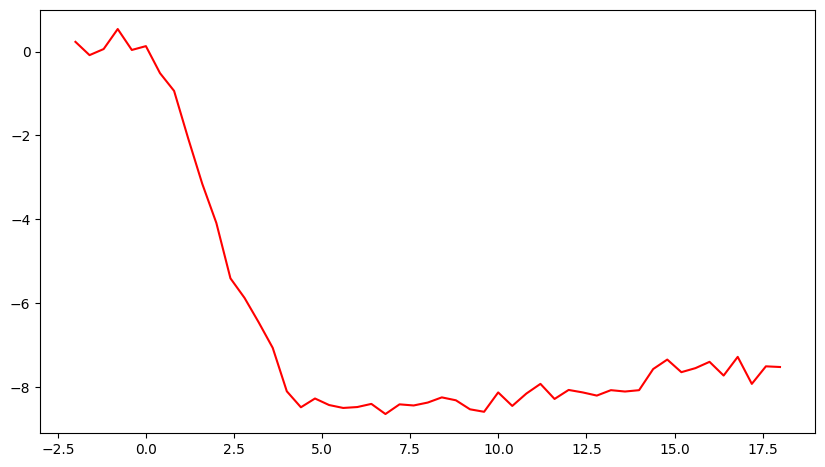

In [105]:

fig, plots = plt.subplots(1, 1, figsize=(10,5.5))

date=20240312
flist = glob.glob("./data/waveforms/%s/*P096*"%(date))
flist2= glob.glob("./data/waveforms/%s/*P050*"%(date))
flist3= glob.glob("./data/waveforms/%s/*P150*"%(date))

channel_names=["Time" ,"Trigger","Anode_Preamp","Cathode_Preamp","Average_Cathode_Preamp","Average_Anode_Preamp"]

manual_ypos=[-15,-16.5,-18,-20,-20]
#print(flist)
last_ypos=0
#P=[0.99,1.3,2.0,2.7,3.5,5]

colors=["r","blue","lightcoral","black","green","darkviolet"]

for i,subdir in enumerate(flist):

    #if i <= 4:
     #   print(i)
        #continue



    fname=glob.glob(subdir+"/*")[-1]
    fname=fname.replace("\\","/")
    print(fname)
    info=find_arg_waveforms(fname)
    #if info["Pressure"] != "5.0":
    #    continue
    #print(info["Cathode"])
    #print(fname)

    cpos=fname.find("C")
    label="Cathode %s V"%(info["Cathode"])

    DF=pd.read_csv(fname,skiprows=[0,1],names=channel_names)
    DFtemp=DF
    DF=DF[::100]
    offset_norm_cathode =np.average(DFtemp["Average_Cathode_Preamp"][:100])
    offset_norm_anode   =np.average(DFtemp["Average_Anode_Preamp"][:100])

    plt.errorbar(x=DF["Time"],y=DF["Average_Cathode_Preamp"]-offset_norm_cathode,color=colors[i],label=label)
    #plt.errorbar(x=DF["Time"],y=DF["Average_Anode_Preamp"]-offset_norm_anode, fmt="-.",color=colors[i])
    
    #ypos=DF["Average_Cathode_Preamp"].loc[4500]-DF["Average_Cathode_Preamp"].iloc[0]#=max(DF["average(B)"]-DF["average(B)"].loc[0])

    #print(ypos,P[i],colors[i],abs(last_ypos-ypos))

    #print(DF["Time"])
    ypos = np.average(DFtemp["Average_Cathode_Preamp"][-1200:])-DF["Average_Cathode_Preamp"].loc[0] -2
    xpos = 8#DFtemp["Time"].loc[len(DFtemp["Time"])-100]
    if info["Cathode"] == "700":
        ypos=ypos
    
    print(abs(ypos-last_pos) )
    if abs(ypos-last_pos) < 1:
        ypos=ypos-2
    #print(xpos)
    if info["Cathode"] == "500":
        xpox=xpos+2

    ypos=manual_ypos[i]
    #plt.text(xpos,ypos,label,color=colors[i], size=10,ha="left")
    last_ypos=ypos




for i,subdir in enumerate(flist2):

    #if i <= 4:
     #   print(i)
        #continue




    fname=glob.glob(subdir+"/*")[-1]
    fname=fname.replace("\\","/")
    print(fname)
    info=find_arg_waveforms(fname)
    #if info["Pressure"] != "5.0":
    #    continue
    #print(info["Cathode"])
    #print(fname)

    cpos=fname.find("C")
    label="Cathode %s V"%(info["Cathode"])

    DF=pd.read_csv(fname,skiprows=[0,1],names=channel_names)
    DFtemp=DF
    DF=DF[::100]
    offset_norm_cathode =np.average(DFtemp["Average_Cathode_Preamp"][:100])
    offset_norm_anode   =np.average(DFtemp["Average_Anode_Preamp"][:100])

    plt.errorbar(x=DF["Time"],y=DF["Average_Cathode_Preamp"]-offset_norm_cathode,fmt="--",color=colors[i])#,label=label)
    #plt.errorbar(x=DF["Time"],y=DF["Average_Anode_Preamp"]-offset_norm_anode, fmt="-.",color=colors[i])
    
    #ypos=DF["Average_Cathode_Preamp"].loc[4500]-DF["Average_Cathode_Preamp"].iloc[0]#=max(DF["average(B)"]-DF["average(B)"].loc[0])

    #print(ypos,P[i],colors[i],abs(last_ypos-ypos))

    #print(DF["Time"])
    ypos = np.average(DFtemp["Average_Cathode_Preamp"][-1200:])-DF["Average_Cathode_Preamp"].loc[0] -2
    xpos = 8#DFtemp["Time"].loc[len(DFtemp["Time"])-100]
    if info["Cathode"] == "700":
        ypos=ypos
    
    print(abs(ypos-last_pos) )
    if abs(ypos-last_pos) < 1:
        ypos=ypos-2
    #print(xpos)
    if info["Cathode"] == "500":
        xpox=xpos+2

    ypos=manual_ypos[i]
    #plt.text(xpos,ypos,label,color=colors[i], size=10,ha="left")
    last_ypos=ypos



for i,subdir in enumerate(flist3):

    #if i <= 4:
     #   print(i)
        #continue




    fname=glob.glob(subdir+"/*")[-1]
    fname=fname.replace("\\","/")
    print(fname)
    info=find_arg_waveforms(fname)
    #if info["Pressure"] != "5.0":
    #    continue
    #print(info["Cathode"])
    #print(fname)

    cpos=fname.find("C")
    label="Cathode %s V"%(info["Cathode"])

    DF=pd.read_csv(fname,skiprows=[0,1],names=channel_names)
    DFtemp=DF
    DF=DF[::100]
    offset_norm_cathode =np.average(DFtemp["Average_Cathode_Preamp"][:100])
    offset_norm_anode   =np.average(DFtemp["Average_Anode_Preamp"][:100])

    plt.errorbar(x=DF["Time"],y=DF["Average_Cathode_Preamp"]-offset_norm_cathode,fmt=":",color=colors[i])#,label=label)
    #plt.errorbar(x=DF["Time"],y=DF["Average_Anode_Preamp"]-offset_norm_anode, fmt="-.",color=colors[i])
    
    #ypos=DF["Average_Cathode_Preamp"].loc[4500]-DF["Average_Cathode_Preamp"].iloc[0]#=max(DF["average(B)"]-DF["average(B)"].loc[0])

    #print(ypos,P[i],colors[i],abs(last_ypos-ypos))

    #print(DF["Time"])
    ypos = np.average(DFtemp["Average_Cathode_Preamp"][-1200:])-DF["Average_Cathode_Preamp"].loc[0] -2
    xpos = 8#DFtemp["Time"].loc[len(DFtemp["Time"])-100]
    if info["Cathode"] == "700":
        ypos=ypos
    
    print(abs(ypos-last_pos) )
    if abs(ypos-last_pos) < 1:
        ypos=ypos-2
    #print(xpos)
    if info["Cathode"] == "500":
        xpox=xpos+2

    ypos=manual_ypos[i]
    #plt.text(xpos,ypos,label,color=colors[i], size=10,ha="left")
    last_ypos=ypos


plt.text(6,-4,"P = 15psi ")
plt.text(6,-12,"P = 9.6psi ")

plt.text(6,-15.5,"P = 5psi ")




plt.grid()
plt.ylabel("mV")
plt.xlabel("uS")
plt.xlim(-1.7,12)
plt.legend()
plt.title("Preamp signal from Cathode :Anode (%s volts), Laser(%s Amps)"%( info["Anode"],info["Laser"]))
#plt.yscale("log")

#plt.ylim(0,125)

    






In [ ]:
channel_names=["Time" ,"Trigger","Anode_Preamp","Cathode_Preamp","Average_Cathode_Preamp","Average_Anode_Preamp"]
fname='./data/waveforms/20240312/20240312-A200-C500-L28-P050-tuesday/20240312-A200-C500-L28-P050-tuesday_11.csv'
DF_t=pd.read_csv(fname,skiprows=[0,1],names=channel_names)


channel_names=["Time" ,"Trigger","Anode_Preamp","Average_Anode_Preamp"]
fname='./data/waveforms/20240311/20240311-A200-C500-L28-P050-monday/20240311-A200-C500-L28-P050-monday_11.csv'
DF_m=pd.read_csv(fname,skiprows=[0,1],names=channel_names)

channel_names=["Time" ,"Trigger","Anode_Preamp","Average_Anode_Preamp"]
fname='./data/waveforms/20240308/20240308-A200-C500-L28-P050/20240308-A200-C500-L28-P050_11.csv'
DF_f=pd.read_csv(fname,skiprows=[0,1],names=channel_names)



fig, plot = plt.subplots(1, 1, figsize=(10,5.5))
#plot[0].errorbar(DF_f["Time"],DF_f["Average_Anode_Preamp"], label="Friday")
#plot[0].errorbar(DF_m["Time"],DF_m["Average_Anode_Preamp"],label="Monday")
#plot[0].errorbar(DF_t["Time"],DF_t["Average_Anode_Preamp"], label="Tuesday")


plot.errorbar(DF_f["Time"],DF_f["Average_Anode_Preamp"]-np.average(DF_f["Average_Anode_Preamp"][:100]), label="Friday 03/09")
plot.errorbar(DF_m["Time"],DF_m["Average_Anode_Preamp"]-np.average(DF_m["Average_Anode_Preamp"][:100]), label="Monday 03/11")
plot.errorbar(DF_t["Time"],DF_t["Average_Anode_Preamp"]-np.average(DF_t["Average_Anode_Preamp"][:100]), label="Tuesday 03/12**")

plt.text(-2.5,20,"** Tuesday's data was \ntaken with Cathode attached \nto 2nd preamp")


info=find_arg_waveforms(fname)
print(info)

plot.grid()
plot.set_xlabel("uS")
plot.set_ylabel("mV")
plot.legend()
plt.title("Preamp signal for cathode(500 V) Pressure (5) psi), Anode (%s volts), Laser(%s Amps)"%( info["Anode"],info["Laser"]))

In [129]:
colors=["r","blue","lightcoral","gray","green","darkviolet","magenta","cyan","peru","lime","dimgrey","steelblue"]

./data/waveforms/20240314/20240314-A200-C600-L28-P174-T174/20240314-A200-C600-L28-P174-T174_11.csv
i 0
./data/waveforms/20240314/20240314-A200-C600-L28-P200/20240314-A200-C600-L28-P200_11.csv
i 1
./data/waveforms/20240314/20240314-A200-C600-L28-P253/20240314-A200-C600-L28-P253_11.csv
i 2
./data/waveforms/20240314/20240314-A200-C600-L28-P291-T205/20240314-A200-C600-L28-P291-T205_11.csv
i 3
./data/waveforms/20240314/20240314-A200-C600-L28-P296-T200/20240314-A200-C600-L28-P296-T200_11.csv
i 4
./data/waveforms/20240314/20240314-A200-C600-L28-P297-T182/20240314-A200-C600-L28-P297-T182_11.csv
i 5
./data/waveforms/20240314/20240314-A200-C600-L28-P302/20240314-A200-C600-L28-P302_11.csv
i 6
./data/waveforms/20240314/20240314-A200-C600-L28-P307-T273/20240314-A200-C600-L28-P307-T273_11.csv
i 7
./data/waveforms/20240314/20240314-A200-C600-L28-P315-T188/20240314-A200-C600-L28-P315-T188_10.csv
i 8


Text(0.5, 1.0, 'Preamp signal for Pressure(31.5 psi), Anode (200 volts), Laser(28 Amps)')

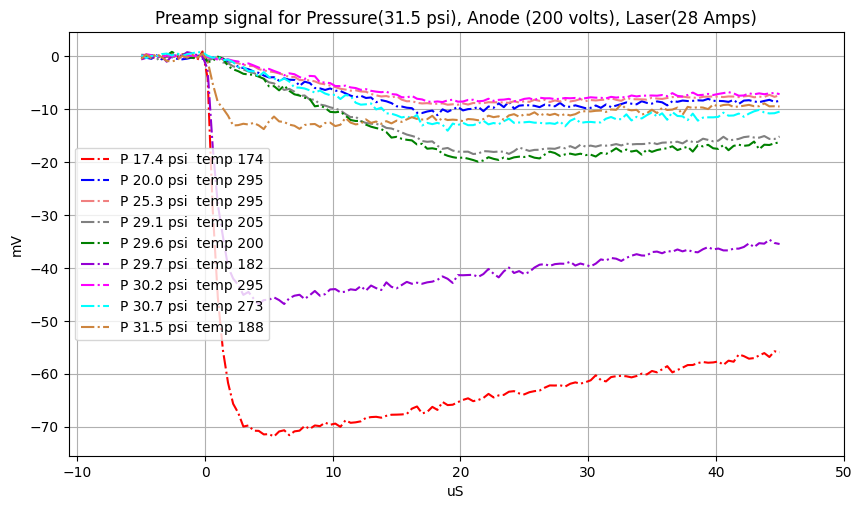

In [130]:

fig, plots = plt.subplots(1, 1, figsize=(10,5.5))

date=20240314
flist = glob.glob("./data/waveforms/%s/*"%(date))

channel_names=["Time" ,"Trigger","Anode_Preamp","Cathode_Preamp","Average_Cathode_Preamp","Average_Anode_Preamp"]



manual_ypos=[-15,-16.5,-18,-20,-20]
#print(flist)
last_ypos=0
#P=[0.99,1.3,2.0,2.7,3.5,5]

#colors=["r","blue","lightcoral","gray","green","darkviolet"]
i=0
for j,subdir in enumerate(flist):

    #if i <= 4:
     #   print(i)
        #continue
    if len(glob.glob(subdir+"/*")) <=1:
        #i=i-1
        #print(i)
        continue
    fname=glob.glob(subdir+"/*")[-1]
    fname=fname.replace("\\","/")
    info=find_arg_waveforms(fname)
    #print(float(info["Pressure"]))
    if float(info["Pressure"]) < 15.7:
        #i=i-1
        #print(i)
        continue
    if info["noise"]==1:
        continue



    
    print(fname)
    file=open(fname)
    flines=file.readlines()
    unit_str=flines[1]
    
    file.close()
    unit_str=unit_str.replace("(","")
    unit_str=unit_str.replace(")","")
    unit_str=unit_str.replace("\n","")
    units=unit_str.split(",")

    #print(j,i,units)
 
    #print(info["Cathode"])
    #print(fname)

    cpos=fname.find("C")
    label="P %s psi  temp %s"%(info["Pressure"],info["Temperature"])

    DF=pd.read_csv(fname,skiprows=[0,1],names=channel_names)
    #print(DF)
    #gather conversion factor
    conversion={}
    if 1==1:
        for k,unit in enumerate(units):
            chan=channel_names[k]
            #print(k,unit,chan)
            if unit=="V":
                conversion[chan]=1000
            elif unit=="mV":
                conversion[chan]=1
            else:
                conversion[chan]=1

    
        for chan in channel_names:
            DF[chan]=DF[chan]*conversion[chan]
    DFtemp=DF
    DF=DF[::100]
    offset_norm_cathode =np.average(DFtemp["Average_Cathode_Preamp"][:100])
    offset_norm_anode   =np.average(DFtemp["Average_Anode_Preamp"][:100])
    print("i",i)
    #plt.errorbar(x=DF["Time"],y=DF["Average_Cathode_Preamp"]-offset_norm_cathode,color=colors[i],label=label)
    plt.errorbar(x=DF["Time"],y=DF["Average_Anode_Preamp"]-offset_norm_anode, fmt="-.",color=colors[i],label=label)
    
    #ypos=DF["Average_Cathode_Preamp"].loc[4500]-DF["Average_Cathode_Preamp"].iloc[0]#=max(DF["average(B)"]-DF["average(B)"].loc[0])

    #print(ypos,P[i],colors[i],abs(last_ypos-ypos))

    #print(DF["Time"])
    ypos = np.average(DFtemp["Average_Cathode_Preamp"][-1200:])-DF["Average_Cathode_Preamp"].loc[0] -2
    xpos = 8#DFtemp["Time"].loc[len(DFtemp["Time"])-100]
    #if info["Cathode"] == "700":
    #ypos=ypos
    
    #print(abs(ypos-last_ypos) )
    #if abs(ypos-last_ypos) < 1:
    #    ypos=ypos-2
    #print(xpos)
    #if info["Cathode"] == "500":
    #    xpox=xpos+2

    #ypos=manual_ypos[i]
    #plt.text(xpos,ypos,label,color=colors[i], size=10,ha="left")
    #last_ypos=ypos
    i=i+1
    if i > 5:
        continue
#DF_13=DF_old[4]
#DF_27=DF_old[5]
#DF=DF_13[:-16000:100]
#plt.errorbar(x=DF["Time"],y=DF["average(B)"]-DF["average(B)"].loc[0], color="blue",fmt="-.")
#plt.text(15,15,"Thrus: 1.3 psi",color="blue", size=10,ha="left")

#DF=DF_27[:-16000:100]
#plt.errorbar(x=DF["Time"],y=DF["average(B)"]-DF["average(B)"].loc[0],            color="black",fmt="-.")
#plt.text(15,5,"Thurs 2.7 psi",color="black", size=10,ha="left")    
#plt.text(6,-7,"Cathode Signal")
#plt.text(6,6,"Anode Signal")




plt.grid()
plt.ylabel("mV")
plt.xlabel("uS")
plt.xlim(-10.7,50)
plt.legend()
plt.title("Preamp signal for Pressure(%s psi), Anode (%s volts), Laser(%s Amps)"%(info["Pressure"], info["Anode"],info["Laser"]))
#plt.yscale("log")

#plt.ylim(-50,52)

    






./data/waveforms/20240314/20240314-A200-C600-L28-P150/20240314-A200-C600-L28-P150_11.csv
i 0
./data/waveforms/20240314/20240314-A200-C600-L28-P200/20240314-A200-C600-L28-P200_11.csv
i 1
./data/waveforms/20240314/20240314-A200-C600-L28-P253/20240314-A200-C600-L28-P253_11.csv
i 2
./data/waveforms/20240314/20240314-A200-C600-L28-P302/20240314-A200-C600-L28-P302_11.csv
i 3
./data/waveforms/20240314/20240314-A200-C600-L28-P303-T233/20240314-A200-C600-L28-P303-T233_11.csv
i 4
./data/waveforms/20240314/20240314-A200-C600-L28-P307-T250/20240314-A200-C600-L28-P307-T250_11.csv
i 5


Text(0.5, 1.0, 'Preamp signal for the cathode/anode \n Settings Cathode (600 volts) Anode (200 volts), Laser(28 Amps)')

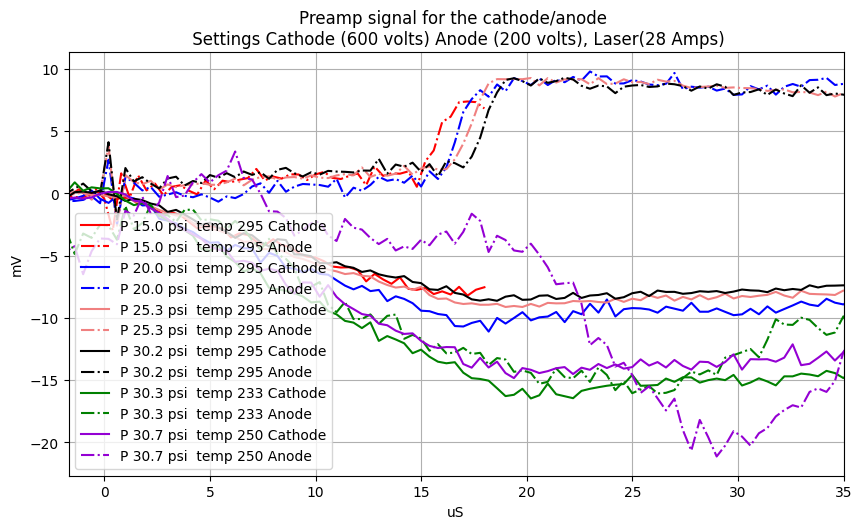

In [146]:

fig, plots = plt.subplots(1, 1, figsize=(10,5.5))

date=20240314
flist = glob.glob("./data/waveforms/%s/**"%(date))

channel_names=["Time" ,"Trigger","Anode_Preamp","Cathode_Preamp","Average_Anode_Preamp","Average_Cathode_Preamp"]



manual_ypos=[-15,-16.5,-18,-20,-20]
#print(flist)
last_ypos=0
#P=[0.99,1.3,2.0,2.7,3.5,5]


i=0
for j,subdir in enumerate(flist):

    #if i <= 4:
     #   print(i)
        #continue
    
    if len(glob.glob(subdir+"/*")) <1:
        #i=i-1
        #print(i)
        continue
    fname=glob.glob(subdir+"/*")[-1]
    fname=fname.replace("\\","/")
    info=find_arg_waveforms(fname)
    if info["noise"] ==1:
        continue
    #print(float(info["Pressure"]))
    if float(info["Temperature"]) < 210:
        #i=i-1
        #print(i)
        continue
    if i >5:
       continue


    
    print(fname)
    file=open(fname)
    flines=file.readlines()
    unit_str=flines[1]
    
    file.close()
    unit_str=unit_str.replace("(","")
    unit_str=unit_str.replace(")","")
    unit_str=unit_str.replace("\n","")
    units=unit_str.split(",")

    #print(j,i,units)
 
    #print(info["Cathode"])
    #print(fname)

    cpos=fname.find("C")
    label="P %s psi  temp %s"%(info["Pressure"],info["Temperature"])

    DF=pd.read_csv(fname,skiprows=[0,1],names=channel_names)
    #print(DF)
    #gather conversion factor
    conversion={}
    if 1==1:
        for k,unit in enumerate(units):
            chan=channel_names[k]
            #print(k,unit,chan)
            if unit=="V":
                conversion[chan]=1000
            elif unit=="mV":
                conversion[chan]=1
            else:
                conversion[chan]=1

    
        for chan in channel_names:
            DF[chan]=DF[chan]*conversion[chan]
    DFtemp=DF
    DF=DF[::100]
    offset_norm_cathode =np.average(DFtemp["Average_Cathode_Preamp"][:100])
    offset_norm_anode   =np.average(DFtemp["Average_Anode_Preamp"][:100])
    print("i",i)
    plt.errorbar(x=DF["Time"],y=DF["Average_Cathode_Preamp"]-offset_norm_cathode,color=colors[i],label=label+" Cathode")
    plt.errorbar(x=DF["Time"],y=DF["Average_Anode_Preamp"]-offset_norm_anode, fmt="-.",color=colors[i],label=label+" Anode")
    
    #ypos=DF["Average_Cathode_Preamp"].loc[4500]-DF["Average_Cathode_Preamp"].iloc[0]#=max(DF["average(B)"]-DF["average(B)"].loc[0])

    #print(ypos,P[i],colors[i],abs(last_ypos-ypos))

    #print(DF["Time"])
    ypos = np.average(DFtemp["Average_Cathode_Preamp"][-1200:])-DF["Average_Cathode_Preamp"].loc[0] -2
    xpos = 8#DFtemp["Time"].loc[len(DFtemp["Time"])-100]
    #if info["Cathode"] == "700":
    #ypos=ypos
    
    #print(abs(ypos-last_ypos) )
    #if abs(ypos-last_ypos) < 1:
    #    ypos=ypos-2
    #print(xpos)
    #if info["Cathode"] == "500":
    #    xpox=xpos+2

    #ypos=manual_ypos[i]
    #plt.text(xpos,ypos,label,color=colors[i], size=10,ha="left")
    #last_ypos=ypos
    i=i+1

#DF_13=DF_old[4]
#DF_27=DF_old[5]
#DF=DF_13[:-16000:100]
#plt.errorbar(x=DF["Time"],y=DF["average(B)"]-DF["average(B)"].loc[0], color="blue",fmt="-.")
#plt.text(15,15,"Thrus: 1.3 psi",color="blue", size=10,ha="left")

#DF=DF_27[:-16000:100]
#plt.errorbar(x=DF["Time"],y=DF["average(B)"]-DF["average(B)"].loc[0],            color="black",fmt="-.")
#plt.text(15,5,"Thurs 2.7 psi",color="black", size=10,ha="left")    
#plt.text(6,-7,"Cathode Signal")
#plt.text(6,6,"Anode Signal")




plt.grid()
plt.ylabel("mV")
plt.xlabel("uS")
plt.xlim(-1.7,35)
plt.legend()
plt.title("Preamp signal for the cathode/anode \n Settings Cathode (%s volts) Anode (%s volts), Laser(%s Amps)"%(info["Cathode"],info["Anode"],info["Laser"]))
#plt.yscale("log")

#plt.ylim(-50,52)

    






In [160]:
date=20240314
flist = glob.glob("./data/waveforms/%s/**"%(date))
runs=[]
for fname in flist:
    info=find_arg_waveforms(fname)
    DF=pd.DataFrame.from_dict([info])
    runs.append(DF)


runDF=pd.concat(runs)
runDF


,Laser,Anode,Cathode,Grid,Pressure,Temperature,noise,window,Date,Filename,Path
0,00,200,600,,15.6,173,1,20.0,20240314\20240314,20240314\20240314-A200-C600-L00-P156-T173-nois...,./data/waveforms
0,00,200,600,,20.0,174,1,20.0,20240314\20240314,20240314\20240314-A200-C600-L00-P200-T174-nois...,./data/waveforms
0,28,200,600,,,295,0,NaN,20240314\20240314,20240314\20240314-A200-C600-L28-P150,./data/waveforms
0,28,200,600,,17.4,295,0,NaN,20240314\20240314,20240314\20240314-A200-C600-L28-P174-T174,./data/waveforms
0,28,200,600,,,295,0,NaN,20240314\20240314,20240314\20240314-A200-C600-L28-P200,./data/waveforms
0,28,200,600,,,295,0,NaN,20240314\20240314,20240314\20240314-A200-C600-L28-P253,./data/waveforms
0,28,200,600,,29.1,295,0,NaN,20240314\20240314,20240314\20240314-A200-C600-L28-P291-T205,./data/waveforms
0,28,200,600,,29.6,295,0,NaN,20240314\20240314,20240314\20240314-A200-C600-L28-P296-T200,./data/waveforms
0,28,200,600,,29.7,295,0,NaN,20240314\20240314,20240314\20240314-A200-C600-L28-P297-T182,./data/waveforms
0,28,200,600,,,295,0,NaN,20240314\20240314,20240314\20240314-A200-C600-L28-P302,./data/waveforms


# Analazing march 29th data blocked/unblocked


In [40]:
flist=glob.glob("data/waveforms/20240328/*-blocked*/*789*")
blocked_fname=flist[-1]
flist=glob.glob("data/waveforms/20240328/*-unblocked*/*789*")
unblk_fname=flist[-1]



DF_blked  =pd.read_csv(blocked_fname, skiprows=[1])

DF_unblked=pd.read_csv(unblk_fname, skiprows=[1])



In [41]:
len(np.array(DF_unblked["Avg Cathode"][stt:stp])),len(np.array(DF_blked["Avg Cathode"][newstt:newstp]))

(10903, 10902)

In [42]:
DF_blked.iloc[600 -562]

Time              -9.855000
Channel Trigger    0.000000
Channel Cathode   -0.023807
Channel Anode      0.047429
Channel UV         0.000000
Avg Anode          0.062930
Avg Cathode        0.054053
Name: 38, dtype: float64

0.004 0
600 -1000  :: 9302
600 -1000  :: 9302
10903 10902


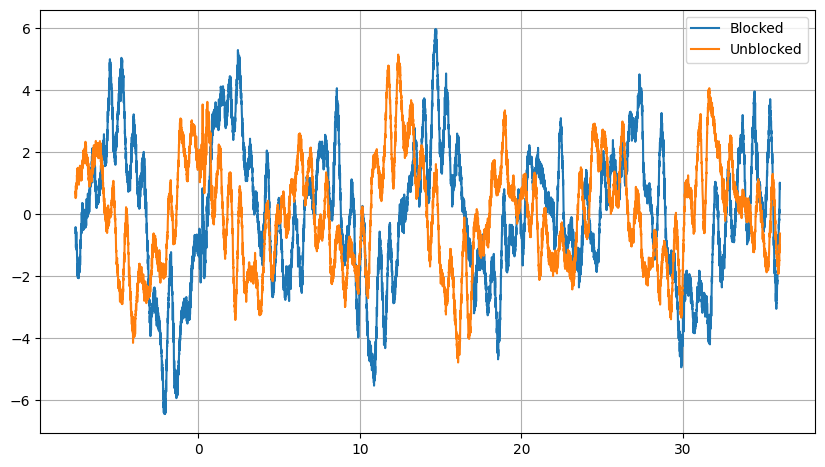

In [105]:
fig, plots = plt.subplots(1, 1, figsize=(10,5.5))

stt,stp,iter =600,-1000,1

guess=-0

timestep=round((DF_blked["Time"].iloc[1]-DF_blked["Time"].iloc[0]),4)
indexshift=int(guess/timestep)

print(timestep,indexshift)
newstt,newstp =stt+indexshift,stp+indexshift
print(stt,stp, " ::" ,len(DF_blked["Time"][stt:stp:iter])+stp-stt)
print(newstt,newstp, " ::" ,len( DF_blked["Time"][newstt:newstp:iter]) + newstp - newstt)

x=np.array(DF_blked["Time"][stt:stp:iter])
y=np.array(DF_blked["Avg Cathode"][stt:stp:iter])*1000 - np.average(DF_blked["Avg Cathode"][stt:stp:iter])*1000

plots.errorbar(x=x,y=y,    label="Blocked")

x=np.array(DF_unblked["Time"][stt:stp:iter])
y=np.array(DF_unblked["Avg Cathode"][stt:stp:iter])*1000 - np.average(DF_unblked["Avg Cathode"][stt:stp:iter])*1000

plots.errorbar(x=x,y=y,label="Unblocked")
plots.legend()
plots.grid()

#y=np.array(DF_unblked["Avg Cathode"][stt:stp])-np.array(DF_blked["Avg Cathode"][newstt:newstp])

print(len(y),len(DF_blked["Time"][stt:stp:iter]))
#fig, plots = plt.subplots(1, 1, figsize=(10,5.5))
#plots.errorbar(x=DF_blked["Time"][stt:stp:iter],y=y)
#plots.legend("True")
#plots.grid()





In [88]:
print(DF_unblked["Time"][0::10].iloc[1] )

-9.96799966


## Determining the phase differnece in the high freguncey noise bewteen blocked and unblocked.

0.004 [0.        0.0199952 0.0399904]
0.004 [0.        0.0199968 0.0399936]
[   1    2    3 ... 6248 6249 6250]


c:\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 0, 'Frequencies [Hz]')

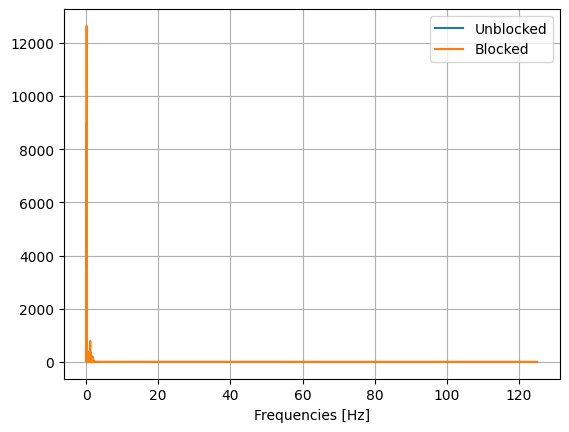

In [101]:

iter=1



stt,stp =0,len(DF_unblked["Time"])
x=np.array(DF_unblked["Time"][stt:stp:iter])
y=np.array(DF_unblked["Avg Cathode"][stt:stp:iter])*1000 - np.average(DF_unblked["Avg Cathode"][stt:stp:iter])*1000
n =len(y)
dt= np.round( (DF_unblked["Time"][stt:stp:iter].iloc[1] - DF_unblked["Time"][stt:stp:iter].iloc[0]),4)
fhat=np.fft.fft(y,n)
psd = fhat* np.conj(fhat)/n
freq= (1/(dt*n)) * np.arange(n)

half_idx=np.arange(1, np.floor(n/2), dtype=np.int32)


plt.plot(freq[half_idx],psd[half_idx], label="Unblocked")

print(dt , freq[:3])

stt,stp =0,len(DF_blked["Time"])
x=np.array(DF_blked["Time"][stt:stp:iter])
y=np.array(DF_blked["Avg Cathode"][stt:stp:iter])*1000 - np.average(DF_blked["Avg Cathode"][stt:stp:iter])*1000
n =len(y)
dt= np.round((DF_blked["Time"][stt:stp:iter].iloc[1] - DF_blked["Time"][stt:stp:iter].iloc[0]),4)
fhat=np.fft.fft(y,n)
psd = fhat* np.conj(fhat)/n
freq= (1/(dt*n)) * np.arange(n)

half_idx=np.arange(1, np.floor(n/2), dtype=np.int32)


plt.plot(freq[half_idx],psd[half_idx], label="Blocked")
print(dt , freq[:3])







plt.grid()
#plt.yscale("log")

#plt.xlim(0,20000)#*10**(8))

#plt.ylim(-10,10)

#print(psd)
plt.legend()
plt.xlabel("Frequencies [Hz]")


## Investigate the amount of drift in trigger timing. 

01 [array([5.00000000e-08, 1.18800002e+00, 1.19600002e+00, 1.20000002e+00,
       1.20400002e+00, 1.20800002e+00, 1.21200002e+00, 1.21600002e+00,
       1.22000002e+00, 1.22400002e+00, 1.22800002e+00, 1.23200002e+00,
       1.23600002e+00, 1.24000002e+00, 1.24400002e+00, 1.24800002e+00,
       1.25200002e+00, 1.25600002e+00, 1.26000002e+00, 1.26400002e+00,
       1.26800002e+00, 1.27200002e+00, 1.27600002e+00, 1.28000002e+00,
       1.28400002e+00, 1.28800002e+00, 1.29200002e+00, 1.29600002e+00,
       1.30000002e+00, 1.30400002e+00, 1.30800002e+00, 1.31200002e+00,
       1.31600002e+00, 1.32000002e+00, 1.32400002e+00, 1.32800002e+00,
       1.33600002e+00])]
02 [array([0.00200005, 1.18600002, 1.19000002, 1.19400002, 1.19800002,
       1.20200002, 1.20600002, 1.21000002, 1.21400002, 1.21800002,
       1.22200002, 1.22600002, 1.23000002, 1.23400002, 1.23800002,
       1.24200002, 1.24600002, 1.25000002, 1.25400002, 1.25800002,
       1.26200002, 1.26600002, 1.27000002, 1.27400002, 1.278

Text(0, 0.5, 'Timing of Trigger Crossing \nThreshold of 1V +- 0.175 (Us)')

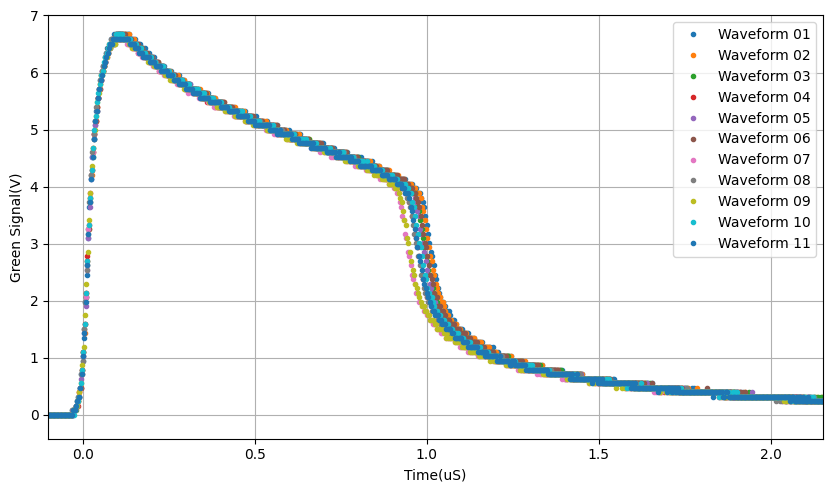

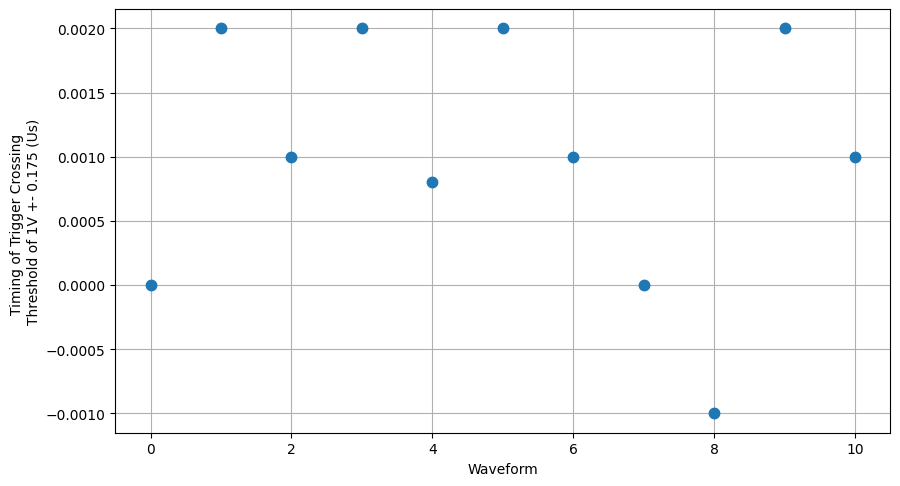

In [34]:
fig, plots = plt.subplots(1, 1, figsize=(10,5.5))

flist=glob.glob("data/waveforms/20240328/*-blocked*/*789*")
blocked_fname=flist[-1]
times=[]

for f in flist:
    waveform= f[-6:-4]
    if int(waveform)==77:
        continue
    DF_blked  =pd.read_csv(f, skiprows=[1])
    stt,stp,iter =0,-1,1
    plots.errorbar(x=DF_blked["Time"][stt:stp:iter],y=DF_blked["Channel Trigger"][stt:stp:iter],fmt=".", label="Waveform %s"%(waveform))

    y=np.array(DF_blked["Channel Trigger"][stt:stp:iter])
    x=np.array(DF_blked["Time"][stt:stp:iter])
    trig_loc=np.where(abs(y-1)<=0.1275)
    #print(trig_loc)
    
    trig_time = [ x[i] for i in trig_loc ]
    times.append(trig_time[0][0])
    print(waveform ,trig_time)


    


plt.grid()
plt.xlim(-0.1,2.152)
plt.legend()
plt.ylabel("Green Signal(V)")
plt.xlabel("Time(uS)")


fig, plts = plt.subplots(1, 1, figsize=(10,5.5))

plts.errorbar(x=np.arange(0,len(times),1),fmt=".",ms=15,y=np.array(times))
plts.grid()
plts.set_xlabel("Waveform")
plts.set_ylabel("Timing of Trigger Crossing \nThreshold of 1V +- 0.175 (Us)")

In [108]:
times[0]

5e-08

<ErrorbarContainer object of 3 artists>

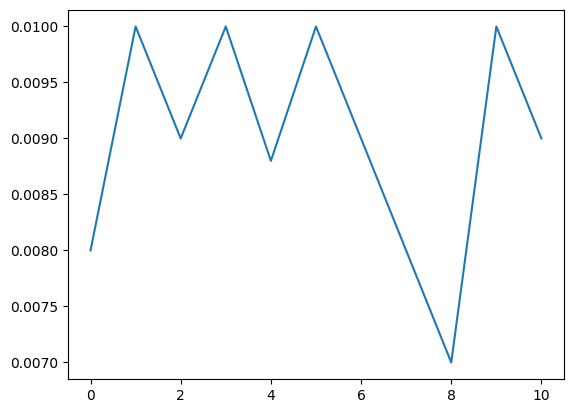

In [116]:
plt.errorbar(x=np.arange(0,len(times),1),y=np.array(times))

In [125]:
def errfunc(x, a, b, z, f):
    return a * scipy.special.erf((x - z)*f) + b

# faking some singal to under psd better

1000000
[0.00029037 0.00029037 0.00029036 0.00029036 0.00029036 0.00029035
 0.00029035 0.00029035 0.00029034 0.00029034]
300000 50000
350000


<ErrorbarContainer object of 3 artists>

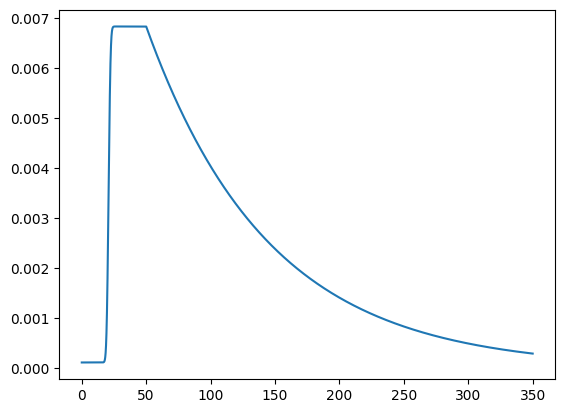

In [189]:
TimeStep=0.001 #time steps in s

TRange=[0,1140]  #range in seconds
Time=np.arange(TRange[0],TRange[1],TimeStep)
print(len(Time))


signalt=50
signal=errfunc(Time[0:int(signalt/0.001)],3.35830177e-03, 4.59707596e-02, 2.07977291e+01, 5.89358767e-01) - 0.0425

decayt=300

decaytime=Time[0:int(decayt/0.001)]

decay= np.array(signal[-1]*np.exp( -decaytime/95 ))
print(decay[-10:])


print(len(decay),len(signal) )
signal= np.concatenate([signal,decay])

print(len(signal),)


plt.errorbar(x=Time[0:int((signalt+decayt)/0.001)],y=signal)


sigfrq = 879
flatline

